In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt

# display plots in this notebook
%matplotlib inline

In [285]:
def Add_multi_molecules(_df_tem):
    df_tem = _df_tem
    df_tem.loc[:, "FRAGSIZE"] = df_tem.loc[:, "end"] - df_tem.loc[:, "start"]
    extra_read = []
    for read in df_tem[df_tem.num_molecules>1].itertuples():
        #print (read)
        num = int(read.num_molecules)
        for num_y in range(1,num):
            extra_read.append(read)
    return pd.concat([df_tem, pd.DataFrame(extra_read)], axis=0)
#pd.concat([df_tem, pd.DataFrame(extra_read).drop('Index',axis=1)], axis=0)

def Generate_Distribution_From_Table(_df_tem, _min, _max):
    Min_Fragsize=_min
    Max_Fragsize=_max
    df_tem = _df_tem
    
    Out_table = np.zeros(Max_Fragsize-Min_Fragsize, dtype=int)
    for idx, x in df_tem.loc[:, "FRAGSIZE"].value_counts(sort=False).items():  
        #print (idx) ## index = fragsize
        if (idx <= Max_Fragsize):
            Out_table[idx-1]=x
    return Out_table

def Process_chunk(_chunk):
    chunk_group = _chunk.groupby(by=["bin_idx"])
    Min_Fragsize=0
    Max_Fragsize=500

    Out_Sum = []
    Out_idx = []
    for group in chunk_group:
        Out_idx.append(group[0])
        df_chunk = Add_multi_molecules(group[1])
        Out_Sum.append(Generate_Distribution_From_Table(df_chunk, Min_Fragsize, Max_Fragsize))

    return Out_idx, Out_Sum

def Merge_ChunkResults(_df_out):
    df_out = _df_out
    df_out_dup = df_out.iloc[df_out.index.duplicated(keep=False), :]
    if (df_out_dup.empty):
        print("NO Chunk is used.")
    else:
        out_extra_idx   = []
        out_extra_table = []
        for dup_group in df_out_dup.groupby(level=0):
            out_extra_idx.append(dup_group[0])
            out_extra_table.append(dup_group[1].sum(axis=0))  ## merge edge of chunksize. by simply addition
        df_out_extra = pd.DataFrame(data=out_extra_table, index=out_extra_idx)
        df_out = pd.concat( [df_out.iloc[df_out.index.drop_duplicates(keep=False), :], df_out_extra], axis=0).sort_index()
    return df_out
#pd.DataFrame(data=Out_Sum, index=Out_idx)

In [299]:
FILE_TYPE = "molecule_table.tsv"
Search_PATH= "./"
df_sum = pd.DataFrame()
chunksize=10**6
Min_Fragsize=0
Max_Fragsize=500

import timeit

start = timeit.default_timer()

for file in os.listdir(Search_PATH):
    if file.endswith(FILE_TYPE):
        out_idx= []
        out_table = []
        for chunk in pd.read_csv(file, sep="\t", chunksize=chunksize):
            tem_idx, tem_table = Process_chunk(chunk)
            out_idx.extend(tem_idx)
            out_table.extend(tem_table)
            #break
    df_out = Merge_ChunkResults(pd.DataFrame(data=out_table, index=out_idx))
    break
    
stop = timeit.default_timer()

print('Time: ', stop - start)

NO Chunk is used.
Time:  0.140882208943367


In [290]:
#df_out.iloc[193,:].plot()
df_out.to_csv("out_for_"+file+'.txt', sep='\t', header=None)

<AxesSubplot:>

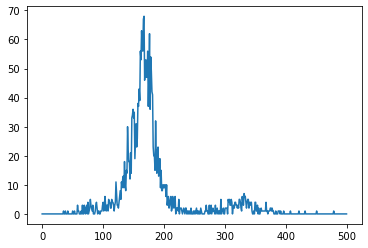

In [296]:
df_out.iloc[193,:].plot()

## Backup

In [77]:
#back up for Add_multi_molecules

df_tem = group[1]
df_tem.loc[:, "FRAGSIZE"] = df_tem.loc[:, "end"] - df_tem.loc[:, "start"]

extra_read = []
for read in df_tem[df_tem.num_molecules>1].itertuples():
    #print (read)
    num = int(read.num_molecules)
    for num_y in range(1,num):
        extra_read.append(read)
df_tem = pd.concat([df_tem, pd.DataFrame(extra_read).drop('Index',axis=1)], axis=0)
#df_tem.loc[:, ["FRAGSIZE"]].value_counts()


#back up for Process_chunk
chunk_group = chunk.groupby(by=["bin_idx"])
Min_Fragsize=0
Max_Fragsize=500

Out_Sum = []
Out_idx = []
for group in chunk_group:
    Out_idx.append(group[0])
    df_tem = Add_multi_molecules(group[1])
    Out_Sum.append(Generate_Distribution_From_Table(df_tem, Min_Fragsize, Max_Fragsize))
    
df_output = pd.DataFrame(data=Out_Sum, index=Out_idx)

## backup Merge_ChunkResults
df_out_dup = df_out.iloc[df_out.index.duplicated(keep=False), :]

out_extra_idx   = []
out_extra_table = []
for dup_group in df_out_dup.groupby(level=0):
    out_extra_idx.append(dup_group[0])
    out_extra_table.append(dup_group[1].sum(axis=0))  ## merge edge of chunksize. by simply addition
df_out_extra = pd.DataFrame(data=out_extra_table, index=out_extra_idx)
    
df_out_final = pd.concat( [df_out.iloc[df_out.index.drop_duplicates(keep=False), :], df_out_extra], axis=0).sort_index()

array([[<AxesSubplot:title={'center':'FRAGSIZE'}>]], dtype=object)

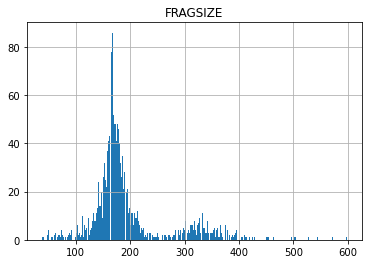

In [121]:
df_tem.loc[:, ["FRAGSIZE"]].hist(bins=600)

In [7]:
def Return_Fragsize_Distribution():
    return None

In [6]:
#pd.read_csv('A035043401.molecule_table.tsv', sep='\t')